# Libraries

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import plotly.express as px
from sktime.utils.plotting import plot_series


# Importing the Dataset

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"clsolive","key":"8baca448d5ab859edb1b759ec93ebc79"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download mattiuzc/stock-exchange-data




stock-exchange-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip stock-exchange-data.zip -d stock_price

Archive:  stock-exchange-data.zip
replace stock_price/indexData.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: stock_price/indexData.csv  
  inflating: stock_price/indexInfo.csv  
  inflating: stock_price/indexProcessed.csv  


# Reading the Dataset

In [ ]:
df = pd.read_csv('stock_price/indexData.csv')

In [ ]:
df.shape

(112457, 8)

In [ ]:
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [ ]:
df.Index.unique()

array(['NYA', 'IXIC', 'HSI', '000001.SS', 'GSPTSE', '399001.SZ', 'NSEI',
       'GDAXI', 'KS11', 'SSMI', 'TWII', 'J203.JO', 'N225', 'N100'],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      112457 non-null  object 
 1   Date       112457 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110253 non-null  float64
 4   Low        110253 non-null  float64
 5   Close      110253 non-null  float64
 6   Adj Close  110253 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.9+ MB


## Exploring the Data

In [ ]:
# Date from object to datetime

df.Date = pd.to_datetime(df.Date)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Index      112457 non-null  object        
 1   Date       112457 non-null  datetime64[ns]
 2   Open       110253 non-null  float64       
 3   High       110253 non-null  float64       
 4   Low        110253 non-null  float64       
 5   Close      110253 non-null  float64       
 6   Adj Close  110253 non-null  float64       
 7   Volume     110253 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 6.9+ MB


In [ ]:
df.head(3)

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0


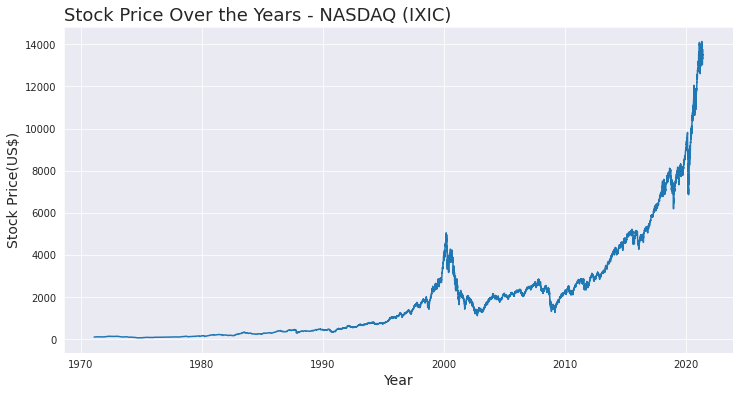

In [ ]:
sns.set_palette('tab10')
sns.set_style('darkgrid')
ax = sns.lineplot(x='Date', y='Close', data = df.query('Index == "IXIC"'))
ax.figure.set_size_inches(12,6)
ax.set_title('Stock Price Over the Years - NASDAQ (IXIC)', loc='left', fontsize= 18)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Stock Price(US$)', fontsize=14)
ax = ax

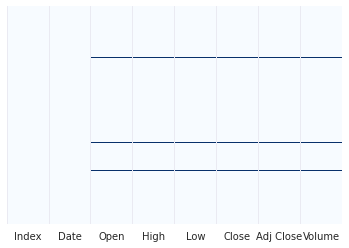

In [ ]:
# Checking for missing data

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

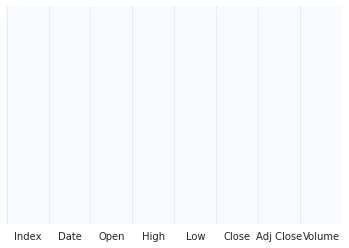

In [ ]:
df.fillna(method='ffill', inplace=True)  # ffill: propagate last valid observation forward to next valid backfill
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [ ]:
df.shape

(112457, 8)

In [ ]:
df_nasdaq=df[df.Index=='IXIC']
df_nasdaq.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
13948,IXIC,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0.0
13949,IXIC,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0.0
13950,IXIC,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0.0
13951,IXIC,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0.0
13952,IXIC,1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0.0


In [ ]:
df_nasdaq = df_nasdaq[['Date', 'Close']]
df_nasdaq = df_nasdaq.reset_index(drop = True)

df_nasdaq.head()

,Date,Close
0,1971-02-05,100.000000
1,1971-02-08,100.839996
2,1971-02-09,100.760002
3,1971-02-10,100.690002
4,1971-02-11,101.449997


In [ ]:
df_nasdaq = df_nasdaq.set_index('Date')
df_nasdaq


,Close
Date,
1971-02-05,100.000000
1971-02-08,100.839996
1971-02-09,100.760002
1971-02-10,100.690002
1971-02-11,101.449997
...,...
2021-05-24,13661.169920
2021-05-25,13657.169920
2021-05-26,13738.000000


In [ ]:
y = df_nasdaq.squeeze(axis = 0)
y

,Close
Date,
1971-02-05,100.000000
1971-02-08,100.839996
1971-02-09,100.760002
1971-02-10,100.690002
1971-02-11,101.449997
...,...
2021-05-24,13661.169920
2021-05-25,13657.169920
2021-05-26,13738.000000


In [ ]:
fig = px.line(df_nasdaq, x = df_nasdaq.index, y="Close")
fig.update_layout(title='Stock Price Over the Years - NASDAQ (IXIC)',
                   xaxis_title='Year',
                   yaxis_title='Stock Price(US$)')
fig.show()

In [ ]:
# Restricting to last 6 years only

df_nasdaq = df_nasdaq.loc['2015-01-01':'2021-05-28']
df_nasdaq


,Close
Date,
2015-01-02,4726.810059
2015-01-05,4652.569824
2015-01-06,4592.740234
2015-01-07,4650.470215
2015-01-08,4736.189941
...,...
2021-05-24,13661.169920
2021-05-25,13657.169920
2021-05-26,13738.000000


In [ ]:
df_resampled = df_nasdaq.resample('1D').ffill()
df_resampled

,Close
Date,
2015-01-02,4726.810059
2015-01-03,4726.810059
2015-01-04,4726.810059
2015-01-05,4652.569824
2015-01-06,4592.740234
...,...
2021-05-24,13661.169920
2021-05-25,13657.169920
2021-05-26,13738.000000


# Predictions

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sktime.forecasting.compose import make_reduction
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe83ee09910>)

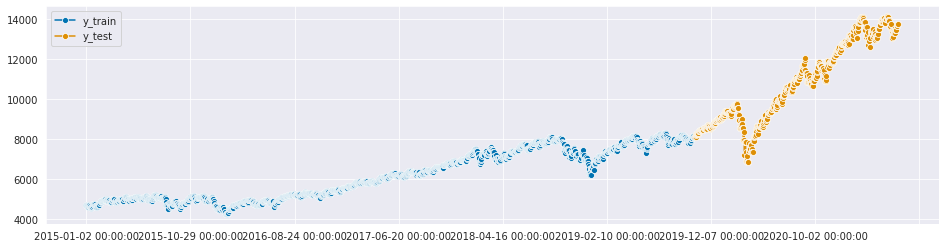

In [ ]:
y = df_resampled

#

y_train, y_test = temporal_train_test_split(y)
plot_series(y_train, y_test, labels=["y_train", "y_test"])

In [ ]:
# # declarative forecaster specification
# regressor = KNeighborsRegressor(n_neighbors=5)
# forecaster = make_reduction(regressor, window_length=15, strategy="recursive",)

In [ ]:
# specifying the forecasting algorithm

from sktime.forecasting.naive import NaiveForecaster
forecaster = NaiveForecaster(strategy="last", sp = 365)
forecaster.fit(y)


NaiveForecaster(sp=365)

In [ ]:
fh = np.arange(1, 1096)

In [ ]:
y_pred = forecaster.predict(fh)
y_pred

/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:105: FutureWarning:

Timestamp.freq is deprecated and will be removed in a future version

/usr/local/lib/python3.7/dist-packages/sktime/utils/datetime.py:107: FutureWarning:

Timestamp.freq is deprecated and will be removed in a future version

/usr/local/lib/python3.7/dist-packages/sktime/forecasting/base/_fh.py:348: FutureWarning:

Timestamp.freqstr is deprecated and will be removed in a future version.



,Close
2021-05-29,9489.870117
2021-05-30,9489.870117
2021-05-31,9489.870117
2021-06-01,9552.049805
2021-06-02,9608.379883
...,...
2024-05-23,13661.169920
2024-05-24,13657.169920
2024-05-25,13738.000000
2024-05-26,13736.280270


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe83d2df8d0>)

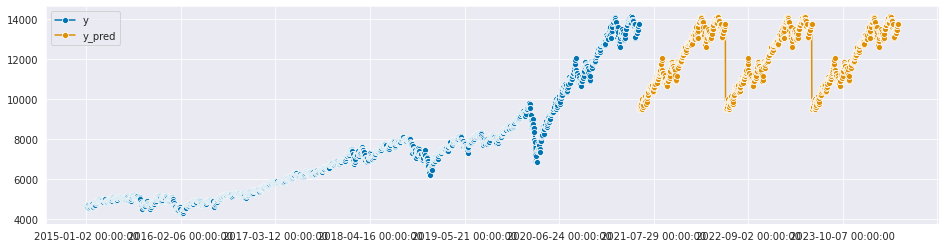

In [ ]:
plot_series(y, y_pred, labels=["y", "y_pred"])